##Carga de rutas.txt

Las rutas relativas están en un archivo .txt por si hay que realizar modificaciones posteriores.

In [ ]:
rutas = './rutas.txt'

In [ ]:
with open(rutas, 'r') as archivo:
    for linea in archivo.readlines():
        exec(linea.strip(), globals())

##Instalación de librerías


In [ ]:
# !pip install -r requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')



##Funciones

In [ ]:
def mapa(matriz:pd.DataFrame, titulo:str) -> None:
    """
    Genera un mapa de calor de la matriz de correlación. Se puede pasar un df con correlación de Pearson o de Spearman.
    """
    plt.figure(figsize=(14,14))
    sns.heatmap(matriz, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, cbar_kws={"shrink": .8})
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(titulo)
    plt.show()


In [ ]:
def resaltar(valor:float, umbral:float = None) -> str:
    """
    Función para resaltar valores en una matriz de correlación según umbrales y colores dados.
    Retorna un string con el estilo CSS.
    """

    positivo = '#3AE51A'
    positivo_01 = '#DAFDEC'
    positivo_02 = '#C7FDDF'
    positivo_03 = '#ABFBCF'
    positivo_04 = '#90FCB6'
    positivo_05 = '#6EFA8E'
    positivo_06 = '#4EF365'
    negativo = '#F2441F'
    negativo_01 = '#FFDBC0'
    negativo_02 = '#FEC89F'
    negativo_03 = '#FEB882'
    negativo_04 = '#FE945C'
    negativo_05 = '#FE793B'
    negativo_06 = '#F76242'
    letra = 'black'

    if umbral != None:
        if valor > umbral and valor < 1:
            return f'background-color: {positivo}; color: {letra}'
        elif valor < -umbral and valor > -1:
            return f'background-color: {negativo}; color: {letra}'
        else:
            return f'color: {letra}'
    else:
        if valor >= 0.1 and valor < 0.2:
           return f'background-color: {positivo_01}; color: {letra}'
        elif valor <= -0.1 and valor > -0.2:
            return f'background-color: {negativo_01}; color: {letra}'
        elif valor >= 0.2 and valor < 0.3:
            return f'background-color: {positivo_02}; color: {letra}'
        elif valor <= -0.2 and valor > -0.3:
            return f'background-color: {negativo_02}; color: {letra}'
        elif valor >= 0.3 and valor < 0.4:
            return f'background-color: {positivo_03}; color: {letra}'
        elif valor <= -0.3 and valor > -0.4:
            return f'background-color: {negativo_03}; color: {letra}'
        elif valor >= 0.4 and valor < 0.5:
            return f'background-color: {positivo_04}; color: {letra}'
        elif valor <= -0.4 and valor > -0.5:
            return f'background-color: {negativo_04}; color: {letra}'
        elif valor >= 0.5 and valor < 0.6:
            return f'background-color: {positivo_05}; color: {letra}'
        elif valor <= -0.5 and valor > -0.6:
            return f'background-color: {negativo_05}; color: {letra}'
        elif valor >= 0.6 and valor < 0.7:
            return f'background-color: {positivo_06}; color: {letra}'
        elif valor <= -0.6 and valor > -0.7:
            return f'background-color: {negativo_06}; color: {letra}'
        elif valor >= 0.7:
            return f'background-color: {positivo}; color: {letra}'
        elif valor <= -0.7:
            return f'background-color: {negativo}; color: {letra}'
        else:
            return f'color: {letra}'





In [ ]:
def visualizar_matriz(matriz:pd.DataFrame, mostrar:bool, ruta:str, umbral:float = None) -> pd.DataFrame | None:
    """
    Visualiza solo la parte inferior de una matriz de correlación, resaltando los valores que superan los umbrales.
    Retorna un DataFrame con la matriz resaltada.
    """
    inferior = matriz.where(np.tril(np.ones(matriz_pearson.shape), k=-1).astype(bool))
    inferior =  inferior.style.applymap(lambda valor: resaltar(valor, umbral))
    if mostrar:
        inferior.to_excel(ruta)
        return inferior
    else:
        inferior.to_excel(ruta)



##Carga de dataset

In [ ]:
df = pd.read_csv(dataset_limpio)

In [ ]:
df.head(2)

,id_orden,anio,mes,dia,dia_semana,id_usuario,volumen_total,productos_distintos_promedio,productos_distintos_total,bultos_productos,perfil_digital,segmento_unico,concentracion,nse,canal,id_producto
0,512-3775628-0,2022,7,6,2,175519,5.18752,4.1,16,2,HighUsage,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,7038
1,512-3995698-0,2022,8,24,2,175519,5.18752,4.1,16,2,HighUsage,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,7038


In [ ]:
df.columns

Index(['id_orden', 'anio', 'mes', 'dia', 'dia_semana', 'id_usuario',
       'volumen_total', 'productos_distintos_promedio',
       'productos_distintos_total', 'bultos_productos', 'perfil_digital',
       'segmento_unico', 'concentracion', 'nse', 'canal', 'id_producto'],
      dtype='object')

In [ ]:
df.shape

(280788, 16)

In [ ]:
df.iloc[:,-5:].head(2)

,segmento_unico,concentracion,nse,canal,id_producto
0,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,7038
1,4.Activos,Medio,Bajo,Kioscos/Maxikioscos,7038


##Codificación de variables categóricas

La primera idea es utilizar LabelEencoder para todas las columnas menos para `canal`, porque, a priori, canal no refleja un factor de importancia (o al menos no puedo asignarlo directamente en esta etapa del proceso). En un primer análisis, parece adecuado LabelEncoder para mantener un orden implícito, porque la hipótesis es que el valor de algunas variables debe afectar el resultado del modelo. Antes de eso, es conveniente verificar los S/D de algunas columnas, ya que si se asigna un valor (puede ser, por ejemplo, 0) y hay una cantidad significativa de S/D en alguna columna como `nse`, esto podría afectar el rendimiento del modelo si es que se termina usando esa columna.



In [ ]:
for columna in df.iloc[:,-5:].columns:
    cantidad = (df[columna]=="S/D").sum()
    porcentaje = round(cantidad/len(df)*100, 2)
    print(f'Columna: {columna:30}   Cantidad S/D: {cantidad:<10}   Porcentaje S/D: {porcentaje} %')

Columna: segmento_unico                   Cantidad S/D: 6165         Porcentaje S/D: 2.2 %
Columna: concentracion                    Cantidad S/D: 18928        Porcentaje S/D: 6.74 %
Columna: nse                              Cantidad S/D: 60767        Porcentaje S/D: 21.64 %
Columna: canal                            Cantidad S/D: 2484         Porcentaje S/D: 0.88 %
Columna: id_producto                      Cantidad S/D: 0            Porcentaje S/D: 0.0 %


Vemos que la variable `nse` (nivel socioeconómico de habitantes alrededor del punto de venta) tiene muchos valores faltantes. Se puede inferir, intuitivamente, que puede ser una característica relevante, por ejemplo, para un modelo de predicción de ventas. La cantidad de faltantes no refleja el total de usuarios, porque pueden haber varios registros por cada usuario.

Se pueden hacer imputaciones, pero, en este caso, no tenemos datos que nos permitan realizar un análisis más profundo. A modo de ejemplo, si tuviésemos información sobre zonas, se podría imputar con un algoritmo de K-means.



###Prueba de codificación con LabelEncoder

In [ ]:
df_prueba = df.copy()
encoder = LabelEncoder()
df_prueba['perfil_digital_codificado'] = encoder.fit_transform(df_prueba['perfil_digital'])
df_prueba[['perfil_digital', 'perfil_digital_codificado']].sample(10)

,perfil_digital,perfil_digital_codificado
279577,S/D,4
75923,PowerUsage,3
159608,PowerUsage,3
253698,PowerUsage,3
42859,MediumUsage,1
108504,PowerUsage,3
192250,PowerUsage,3
17888,PowerUsage,3
33032,HighUsage,0
230042,MediumUsage,1


Se observa que la codificación con LabelEncoder no representa el orden implícito esperado, por lo que se hará un mapeo específico para mantener un orden de importancia adecuado.

In [ ]:
df_prueba1 = df.copy()

##Prueba 1

###Todas las columnas con LabelEncoder menos `canal` (One Hot Encoding)

Mapeamos para mantener un orden de importancia. Asignamos 0 a los valores faltantes (se utiliza camelCase para mantener el formato).

In [ ]:
df.iloc[:,-5:].columns

Index(['segmento_unico', 'concentracion', 'nse', 'canal', 'id_producto'], dtype='object')

In [ ]:
perfil_digital_t = {'S/D': 0, 'MinimalUsage': 1, 'MediumUsage': 2, 'HighUsage': 3, 'PowerUsage': 4}
concentracion_t = {'S/D': 0, 'Bajo': 1, 'Medio': 2, 'Alto': 3}
nse_t = {'S/D': 0, 'Bajo': 1, 'Medio': 2, 'Alto': 3}
segmento_unico_t= {'S/D': 0, '1.Inactivos': 1, '2.Masivos': 2, '3.Potenciales': 3, '4.Activos': 4, '5.Select': 5}

Transformamos las columnas y verificamos antes de borrar las originales.

In [ ]:
df_prueba1['perfil_digital_t'] = df_prueba1['perfil_digital'].map(perfil_digital_t)
df_prueba1['concentracion_t'] = df_prueba1['concentracion'].map(concentracion_t)
df_prueba1['nse_t'] = df_prueba1['nse'].map(nse_t)
df_prueba1['segmento_unico_t'] = df_prueba1['segmento_unico'].map(segmento_unico_t)

In [ ]:
df_prueba1[['perfil_digital', 'perfil_digital_t', 'concentracion', 'concentracion_t', 'nse', 'nse_t', 'segmento_unico', 'segmento_unico_t']].sample(10)

,perfil_digital,perfil_digital_t,concentracion,concentracion_t,nse,nse_t,segmento_unico,segmento_unico_t
209976,PowerUsage,4,Alto,3,Medio,2,5.Select,5
183851,PowerUsage,4,Medio,2,Medio,2,4.Activos,4
130495,PowerUsage,4,Medio,2,Bajo,1,5.Select,5
10292,HighUsage,3,Alto,3,Medio,2,4.Activos,4
207153,MediumUsage,2,Medio,2,Medio,2,1.Inactivos,1
247537,MinimalUsage,1,Alto,3,Medio,2,1.Inactivos,1
167234,PowerUsage,4,Medio,2,Medio,2,4.Activos,4
175671,HighUsage,3,Medio,2,Bajo,1,2.Masivos,2
43111,PowerUsage,4,Alto,3,Bajo,1,5.Select,5
228129,MinimalUsage,1,Medio,2,Bajo,1,2.Masivos,2


In [ ]:
df_prueba1.drop(columns=['perfil_digital', 'concentracion', 'nse', 'segmento_unico'], inplace=True)

In [ ]:
df_prueba1.rename(columns={'perfil_digital_t': 'perfil_digital', 'concentracion_t': 'concentracion', 'nse_t': 'nse', 'segmento_unico_t': 'segmento_unico'}, inplace=True)

In [ ]:
df_prueba1.head(3)

,id_orden,anio,mes,dia,dia_semana,id_usuario,volumen_total,productos_distintos_promedio,productos_distintos_total,bultos_productos,canal,id_producto,perfil_digital,concentracion,nse,segmento_unico
0,512-3775628-0,2022,7,6,2,175519,5.18752,4.1,16,2,Kioscos/Maxikioscos,7038,3,2,1,4
1,512-3995698-0,2022,8,24,2,175519,5.18752,4.1,16,2,Kioscos/Maxikioscos,7038,3,2,1,4
2,512-3935834-0,2022,8,10,2,175519,5.18752,4.1,16,1,Kioscos/Maxikioscos,77846,3,2,1,4


Codificación de columna `canal`

In [ ]:
df_prueba1.shape

(280788, 16)

In [ ]:
df_prueba1['canal'].unique()

array(['Kioscos/Maxikioscos', 'Tradicional', 'COMIDA', 'Autoservicio',
       'BEBIDA', 'Mayorista', 'OTROS REF', 'S/D', 'Bar/Restaurant',
       'Instituciones', 'ENTRETENIMIENTO', 'KA Minoristas'], dtype=object)

In [ ]:
canal_encoded = pd.get_dummies(df_prueba1['canal'], prefix='canal')


In [ ]:
canal_encoded.head()

,canal_Autoservicio,canal_BEBIDA,canal_Bar/Restaurant,canal_COMIDA,canal_ENTRETENIMIENTO,canal_Instituciones,canal_KA Minoristas,canal_Kioscos/Maxikioscos,canal_Mayorista,canal_OTROS REF,canal_S/D,canal_Tradicional
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_prueba1.drop(columns=['canal'], inplace=True)
df_prueba1 = pd.concat([df_prueba1, canal_encoded], axis=1)

In [ ]:
df_prueba1.head()

,id_orden,anio,mes,dia,dia_semana,id_usuario,volumen_total,productos_distintos_promedio,productos_distintos_total,bultos_productos,...,canal_Bar/Restaurant,canal_COMIDA,canal_ENTRETENIMIENTO,canal_Instituciones,canal_KA Minoristas,canal_Kioscos/Maxikioscos,canal_Mayorista,canal_OTROS REF,canal_S/D,canal_Tradicional
0,512-3775628-0,2022,7,6,2,175519,5.18752,4.1,16,2,...,False,False,False,False,False,True,False,False,False,False
1,512-3995698-0,2022,8,24,2,175519,5.18752,4.1,16,2,...,False,False,False,False,False,True,False,False,False,False
2,512-3935834-0,2022,8,10,2,175519,5.18752,4.1,16,1,...,False,False,False,False,False,True,False,False,False,False
3,512-3981409-0,2022,8,20,5,175519,5.18752,4.1,16,1,...,False,False,False,False,False,True,False,False,False,False
4,512-3981409-0,2022,8,20,5,175519,5.18752,4.1,16,1,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_prueba1.shape

(280788, 27)

###Correlación entre datos

In [ ]:
matriz_pearson = df_prueba1.iloc[:, 6:].corr()
matriz_pearson


,volumen_total,productos_distintos_promedio,productos_distintos_total,bultos_productos,id_producto,perfil_digital,concentracion,nse,segmento_unico,canal_Autoservicio,...,canal_Bar/Restaurant,canal_COMIDA,canal_ENTRETENIMIENTO,canal_Instituciones,canal_KA Minoristas,canal_Kioscos/Maxikioscos,canal_Mayorista,canal_OTROS REF,canal_S/D,canal_Tradicional
volumen_total,1.000000,-0.079752,0.059435,0.468401,0.001210,0.013800,-0.039750,-0.065385,0.129440,0.066332,...,-0.002946,-0.017303,-0.003539,-0.010235,0.012205,-0.037369,0.406852,-0.011529,-0.023412,-0.093309
productos_distintos_promedio,-0.079752,1.000000,0.604031,-0.118532,-0.014056,-0.022928,0.074450,0.075751,0.157920,-0.064341,...,-0.003730,0.080112,0.087765,0.010232,0.033332,0.067983,-0.096279,-0.002512,-0.041140,-0.081010
productos_distintos_total,0.059435,0.604031,1.000000,-0.044105,0.029975,0.327955,0.155837,0.149033,0.456246,0.237102,...,-0.017949,-0.143836,-0.038170,-0.056893,-0.033314,0.061574,-0.014190,-0.052008,-0.081535,-0.003051
bultos_productos,0.468401,-0.118532,-0.044105,1.000000,-0.021089,-0.022957,-0.046206,-0.054074,0.046448,0.029111,...,0.000207,-0.014208,0.002966,0.016091,0.001109,-0.028469,0.201361,-0.005695,0.002861,-0.041568
id_producto,0.001210,-0.014056,0.029975,-0.021089,1.000000,0.077822,-0.004154,-0.007019,0.102433,0.033096,...,0.002528,-0.026612,-0.017821,-0.008325,-0.010249,-0.013643,-0.015841,0.000590,-0.007641,0.022491
perfil_digital,0.013800,-0.022928,0.327955,-0.022957,0.077822,1.000000,0.109281,0.093420,0.547213,0.078107,...,-0.026408,-0.247434,-0.150862,-0.095675,-0.095745,0.073365,-0.098368,-0.058061,-0.237405,0.229830
concentracion,-0.039750,0.074450,0.155837,-0.046206,-0.004154,0.109281,1.000000,0.474085,0.104990,-0.062320,...,0.019559,0.054672,-0.077942,-0.043444,0.026674,0.059242,-0.001324,-0.139275,-0.241228,0.025303
nse,-0.065385,0.075751,0.149033,-0.054074,-0.007019,0.093420,0.474085,1.000000,0.070873,-0.001988,...,0.018000,0.033480,-0.049981,0.008715,0.008189,0.004433,-0.073167,-0.081842,-0.143805,0.031014
segmento_unico,0.129440,0.157920,0.456246,0.046448,0.102433,0.547213,0.104990,0.070873,1.000000,0.079116,...,0.005923,-0.003973,-0.007544,-0.222209,-0.248207,0.039363,0.002580,-0.036709,-0.273973,0.063088
canal_Autoservicio,0.066332,-0.064341,0.237102,0.029111,0.033096,0.078107,-0.062320,-0.001988,0.079116,1.000000,...,-0.006814,-0.087300,-0.032120,-0.019364,-0.021629,-0.123544,-0.031667,-0.012341,-0.023874,-0.287084


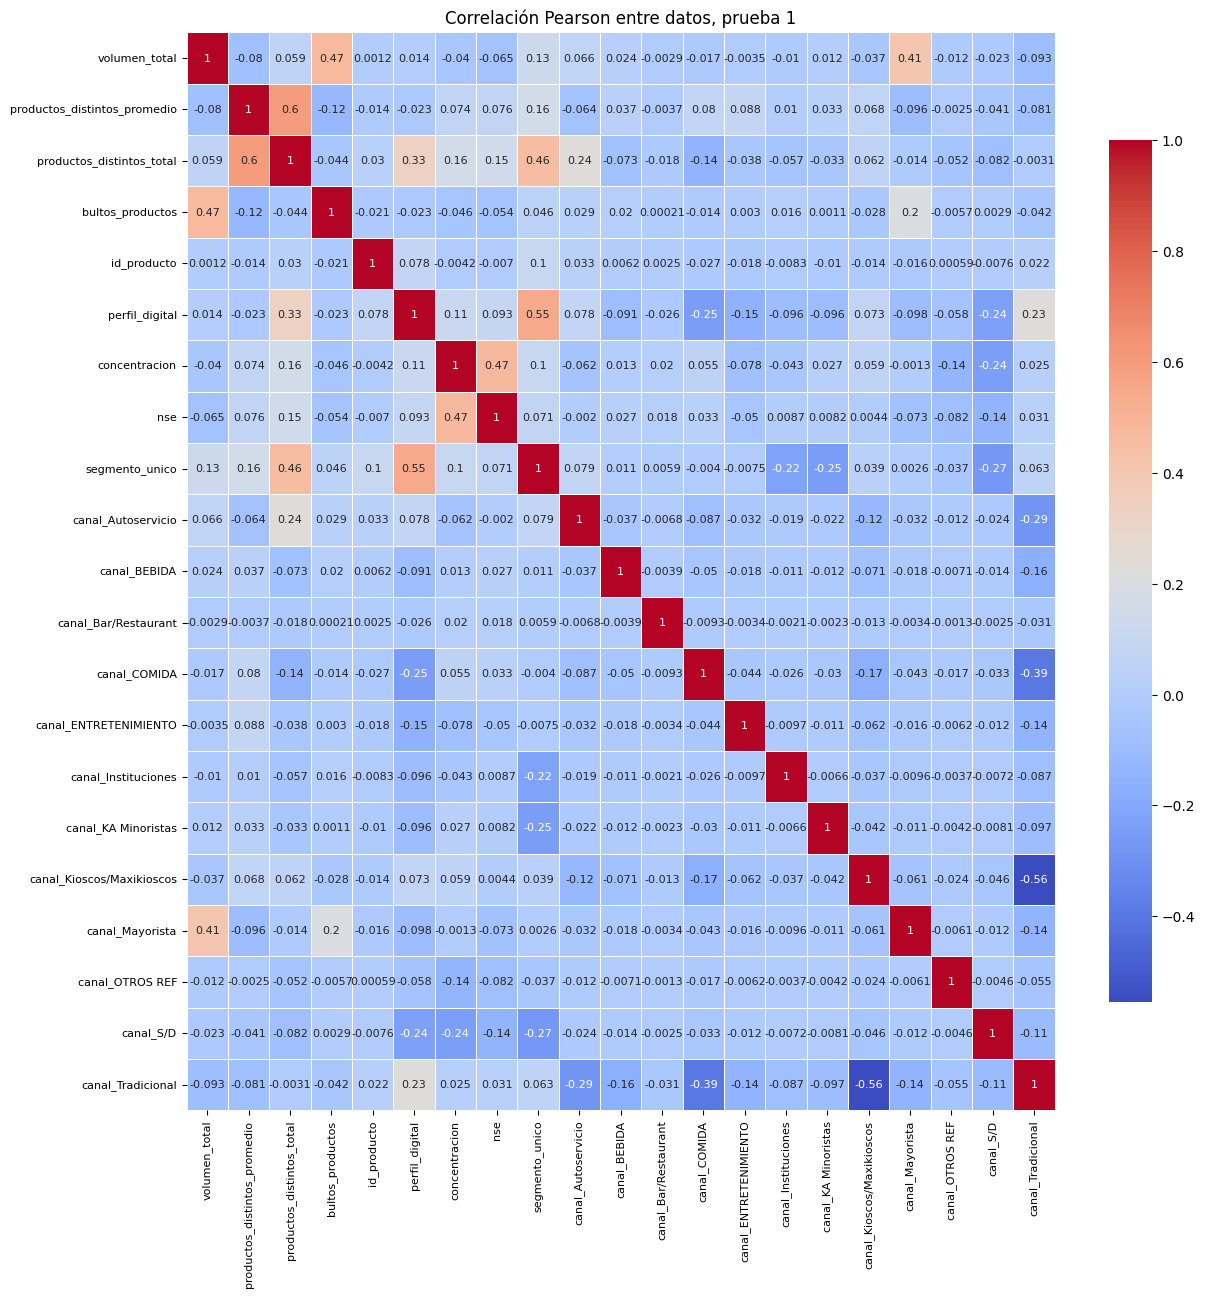

In [ ]:
mapa(matriz_pearson, 'Correlación Pearson entre datos, prueba 1')

In [ ]:
ruta_excel = correlaciones_prueba1 + '/pearson_datos_prueba1.xlsx'
visualizar_matriz(matriz_pearson, False, ruta_excel)


In [ ]:
matriz_spearman = df_prueba1.iloc[:, 6:].corr(method='spearman')
matriz_spearman

,volumen_total,productos_distintos_promedio,productos_distintos_total,bultos_productos,id_producto,perfil_digital,concentracion,nse,segmento_unico,canal_Autoservicio,...,canal_Bar/Restaurant,canal_COMIDA,canal_ENTRETENIMIENTO,canal_Instituciones,canal_KA Minoristas,canal_Kioscos/Maxikioscos,canal_Mayorista,canal_OTROS REF,canal_S/D,canal_Tradicional
volumen_total,1.000000,0.327111,0.619355,0.356314,0.010496,0.160172,0.053225,0.080242,0.429148,0.219204,...,0.012123,0.128053,0.050667,-0.013607,0.058006,-0.050640,0.200747,-0.054796,-0.138489,-0.211405
productos_distintos_promedio,0.327111,1.000000,0.625936,-0.091054,0.037048,-0.023275,0.169329,0.125702,0.150389,-0.074815,...,0.000784,0.107573,0.086821,0.015868,0.032862,0.058037,-0.106454,0.000293,-0.043070,-0.083235
productos_distintos_total,0.619355,0.625936,1.000000,-0.000411,0.062862,0.334363,0.178997,0.167404,0.499204,0.212842,...,-0.019098,-0.134456,-0.035383,-0.061870,-0.028558,0.066100,-0.013662,-0.058168,-0.088131,0.000082
bultos_productos,0.356314,-0.091054,-0.000411,1.000000,-0.063843,-0.078697,-0.040822,-0.038501,0.063101,0.081085,...,0.010391,0.090316,0.061962,0.044664,0.033038,-0.041989,0.181986,-0.006014,-0.010005,-0.152022
id_producto,0.010496,0.037048,0.062862,-0.063843,1.000000,0.040104,0.011120,-0.002929,0.066055,0.025786,...,0.003600,-0.014421,-0.012429,-0.007883,-0.003521,-0.003901,-0.023104,0.005753,-0.005780,0.008449
perfil_digital,0.160172,-0.023275,0.334363,-0.078697,0.040104,1.000000,0.031291,0.071135,0.559691,0.071129,...,-0.024577,-0.248734,-0.146904,-0.086874,-0.097174,0.065233,-0.103637,-0.055741,-0.157045,0.225824
concentracion,0.053225,0.169329,0.178997,-0.040822,0.011120,0.031291,1.000000,0.399710,0.048928,-0.079354,...,0.023484,0.085535,-0.085891,-0.053183,0.046694,0.053260,-0.010955,-0.087539,-0.151510,-0.007659
nse,0.080242,0.125702,0.167404,-0.038501,-0.002929,0.071135,0.399710,1.000000,0.056270,-0.004661,...,0.020716,0.048996,-0.046182,0.004636,0.012412,0.001670,-0.088104,-0.075429,-0.132073,0.022950
segmento_unico,0.429148,0.150389,0.499204,0.063101,0.066055,0.559691,0.048928,0.056270,1.000000,0.040208,...,-0.001550,-0.089824,-0.037670,-0.139164,-0.155446,0.008329,-0.010860,-0.045594,-0.171582,0.133115
canal_Autoservicio,0.219204,-0.074815,0.212842,0.081085,0.025786,0.071129,-0.079354,-0.004661,0.040208,1.000000,...,-0.006814,-0.087300,-0.032120,-0.019364,-0.021629,-0.123544,-0.031667,-0.012341,-0.023874,-0.287084


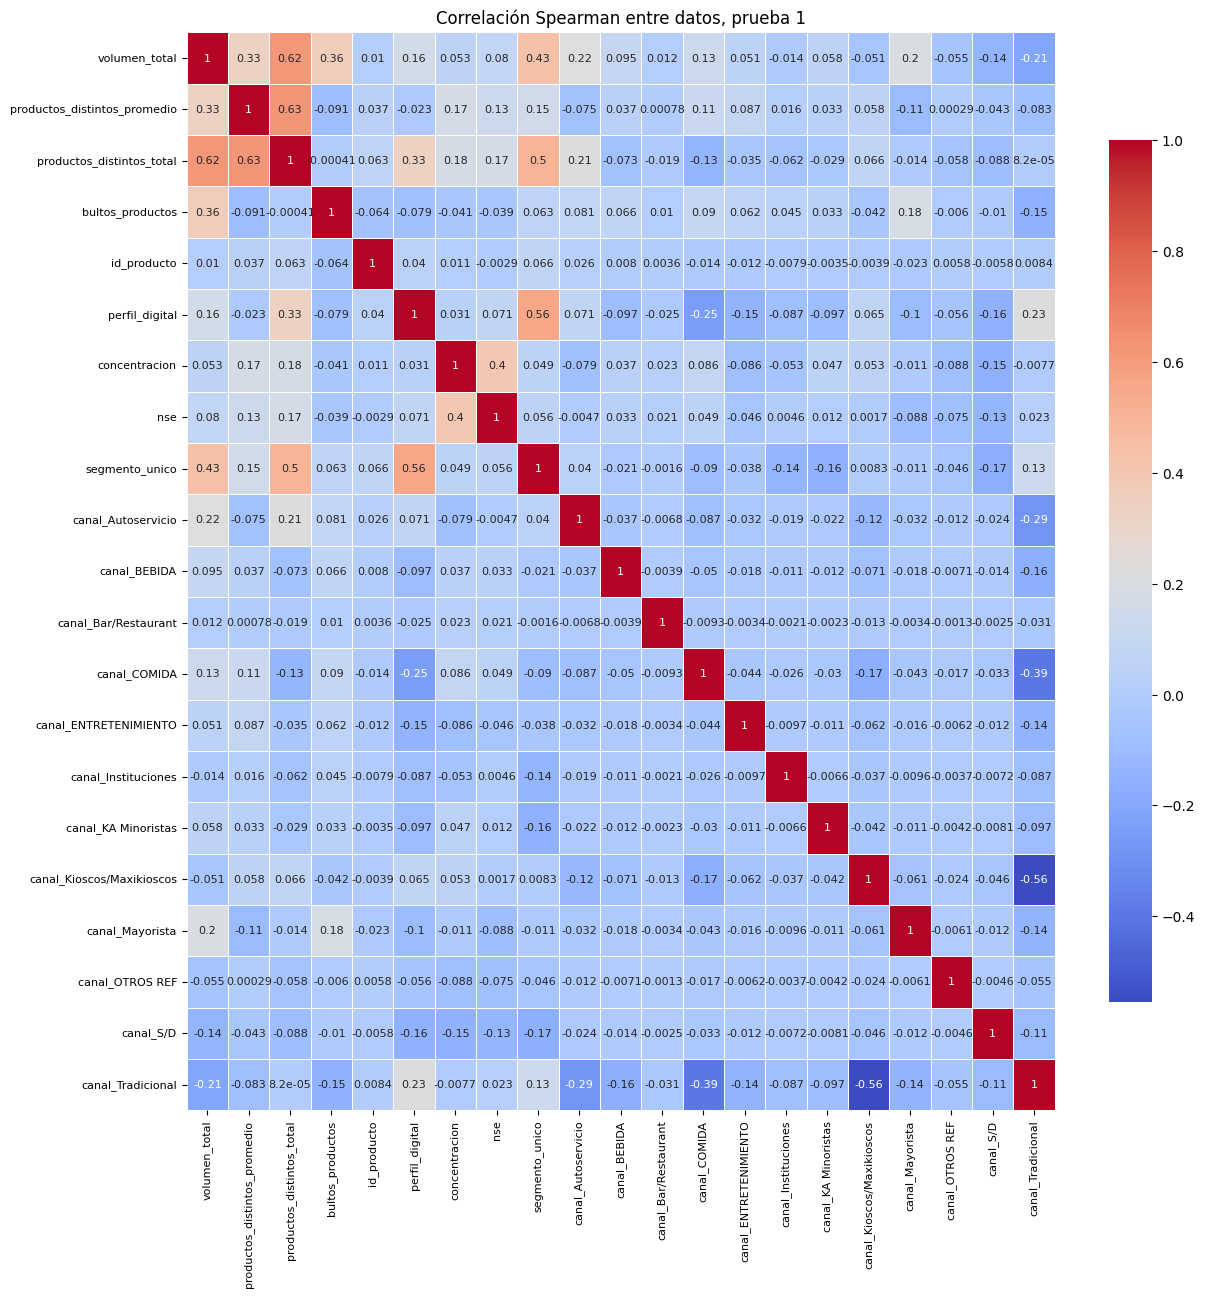

In [ ]:
mapa(matriz_spearman, 'Correlación Spearman entre datos, prueba 1')

In [ ]:
ruta_excel = correlaciones_prueba1 + '/spearman_datos_prueba1.xlsx'
visualizar_matriz(matriz_spearman, False, ruta_excel)

### Análisis de las Matrices de Correlación

#### Correlación de Pearson

**Descripción:**
La matriz de correlación de Pearson muestra la relación lineal entre las diferentes variables del dataset. Aquí se destacan algunos puntos importantes:

1. **Correlaciones entre Canales:**
   - `canal_Tradicional` muestra una correlación negativa significativa con varias otras variables. Esto sugiere que los puntos de venta tradicionales tienen características distintas a otros canales.
   - `canal_Kioscos/Maxikioscos` y `canal_Tradicional` también muestran correlaciones negativas, indicando que estos canales pueden tener características opuestas.

2. **Variables con Correlaciones Insignificantes:**
   - Muchas variables muestran correlaciones muy bajas o insignificantes con otras variables, indicando una independencia lineal entre ellas.


#### Correlación de Spearman

**Descripción:**
La matriz de correlación de Spearman mide la relación monótona entre las variables, capturando relaciones no lineales. A continuación se presentan algunos hallazgos clave:

1. **Correlaciones entre Canales:**
   - Similar a Pearson, `canal_Tradicional` muestra una fuerte correlación negativa con varias otras variables, destacando su diferencia con otros canales.
   - `canal_Kioscos/Maxikioscos` y `canal_Tradicional` también presentan correlaciones negativas, lo que refuerza la observación de que estos canales tienen características opuestas.

2. **Variables con Correlaciones Insignificantes:**
   - Al igual que en Pearson, muchas variables muestran correlaciones bajas o insignificantes, indicando una independencia en sus relaciones no lineales.


### Interpretación General

 **Relaciones Clave:**
   - Las correlaciones negativas significativas con `canal_Tradicional` sugieren que los clientes que utilizan este canal tienen comportamientos y características diferentes en comparación con otros canales.
   - La falta de correlación significativa entre muchas variables indica que hay independencia entre estas, lo cual puede ser útil para identificar características únicas de diferentes segmentos.





In [ ]:
df_prueba1['id_producto'].nunique()

530

###Guardamos backup

In [ ]:
df_prueba1.to_csv(dataset_prueba1, index=False)

##Feature Engineering

Para justificar la selección de características, necesitamos evaluar las relaciones entre las características y la variable objetivo (`id_producto`). Dado que `id_producto` es una variable categórica, podemos utilizar técnicas como la correlación de Pearson, análisis de varianza (ANOVA), y otras pruebas estadísticas para evaluar la importancia de las características. Descartamos de esta selección las variables `id_orden` y `anio`.

`id_orden` no aporta nada al modelo. La vamos a dejar para agrupar los registros, pero no en el dataset de entrenamiento.

`anio` no modifica nada, porque es todo del 2022.

Hay motivos tanto para incluir como para no incluir `id_usuario` como feature:

**Incluir `id_usuario`**:

* Personalización de recomendaciones: El modelo podría aprender patrones específicos de cada usuario, lo que permitiría personalizar las recomendaciones de productos basadas en el historial de compras de cada usuario

* Captura de preferencias individuales: Los usuarios pueden tener preferencias únicas que el modelo puede aprender y aprovechar para hacer predicciones más precisas

**Excluir `id_usuario`**:

* Generalización del modelo: Incluir `id_usuario` puede hacer que el modelo se sobreajuste a los datos específicos de los usuarios presentes en el conjunto de entrenamiento, disminuyendo su capacidad de generalizar a nuevos usuarios

En este caso, **se incluirá `id_usuario`** porque el objetivo es proporcionar recomendaciones personalizadas.



###Evaluación de Características

**Correlación de Pearson** (para características numéricas):

Evaluar la correlación entre las características numéricas y la variable objetivo.


**Análisis de Varianza** (ANOVA):

Evaluar las diferencias entre los grupos de la variable objetivo para las características categóricas.

In [ ]:
features_numericas = ['volumen_total', 'productos_distintos_promedio', 'productos_distintos_total', 'bultos_productos']
objetivo = df['id_producto']

In [ ]:
correlaciones = {}
for feature in features_numericas:
    if feature == 'volumen_total':
        filtrado = df_prueba1[df_prueba1[feature] > 0]
    else:
        filtrado = df_prueba1
    correlaciones[feature] = filtrado[[feature, 'id_producto']].corr().iloc[0, 1]
correlaciones


{'volumen_total': 0.0009548604325347568,
 'productos_distintos_promedio': -0.014056474853481332,
 'productos_distintos_total': 0.029974697334053314,
 'bultos_productos': -0.021089327632864734}

In [ ]:
features_categoricas = ['id_orden', 'id_usuario', 'anio', 'mes', 'dia', 'dia_semana', 'perfil_digital', 'concentracion', 'nse', 'segmento_unico',
                        'canal_Autoservicio', 'canal_BEBIDA', 'canal_Bar/Restaurant', 'canal_COMIDA', 'canal_ENTRETENIMIENTO',
                        'canal_Instituciones', 'canal_KA Minoristas', 'canal_Kioscos/Maxikioscos', 'canal_Mayorista',
                        'canal_OTROS REF', 'canal_S/D', 'canal_Tradicional']

In [ ]:
anova = {}
for feature in features_categoricas:
    if feature == 'id_orden':
        continue
    grupos = [df_prueba1[df_prueba1[feature] == val]['id_producto'] for val in df_prueba1[feature].unique()]
    if len(grupos) > 1:
        f_stat, _ = f_oneway(*grupos)
        anova[feature] = f_stat
    else:
        anova[feature] = None
anova

{'id_usuario': 4.691711325808855,
 'anio': None,
 'mes': 21.696713584264355,
 'dia': 11.848129314134678,
 'dia_semana': 10.160692534492972,
 'perfil_digital': 445.8002717753318,
 'concentracion': 3.7828781019182074,
 'nse': 8.953973371691738,
 'segmento_unico': 708.448747289384,
 'canal_Autoservicio': 307.8934406018581,
 'canal_BEBIDA': 10.94982108736233,
 'canal_Bar/Restaurant': 1.7937632945886945,
 'canal_COMIDA': 199.00046186735233,
 'canal_ENTRETENIMIENTO': 89.19881944155094,
 'canal_Instituciones': 19.463558699246075,
 'canal_KA Minoristas': 29.496617025237565,
 'canal_Kioscos/Maxikioscos': 52.27053901322507,
 'canal_Mayorista': 70.47683411964515,
 'canal_OTROS REF': 0.0976586177737848,
 'canal_S/D': 16.392922565897855,
 'canal_Tradicional': 142.10956034204946}

###Resultados de la Evaluación de Características

**Explicación de la Correlación y ANOVA**:
- **Correlación de Pearson**: Mide la relación lineal entre variables numéricas y la variable objetivo. Las características con una correlación significativa (por ejemplo, |correlación| > 0.3) son seleccionadas.
- **ANOVA (Análisis de Varianza)**: Compara las medias de diferentes grupos categóricos y evalúa si las diferencias son significativas. Las características con un alto valor del estadístico F son seleccionadas.
- **Umbrales para Selección**:
  - **Correlación de Pearson**: Características con |correlación| > 0.3.
  - **ANOVA**:
    - Muy Alta Variabilidad (F > 100)
    - Alta Variabilidad (50 < F <= 100)
    - Moderada Variabilidad (10 < F <= 50)
    - Baja Variabilidad (F <= 10)

**Correlación de Pearson con `id_producto`**:
- `volumen_total`: 0.00095 (No significativa, excluida)
- `productos_distintos_promedio`: -0.014 (No significativa, excluida)
- `productos_distintos_total`: 0.03 (No significativa, excluida)
- `bultos_productos`: -0.021 (No significativa, excluida)

**ANOVA para Características Categóricas**:
- `id_usuario`: F = 4.69 (Considerar para inclusión)
- `anio`: No significativo (excluido)
- `mes`: F = 21.70 (Incluido)
- `dia`: F = 11.85 (Incluido)
- `dia_semana`: F = 10.16 (Incluido)
- `perfil_digital`: F = 445.80 (Muy importante, incluido)
- `concentracion`: F = 3.78 (No significativa, excluida)
- `nse`: F = 8.95 (Considerar para inclusión)
- `segmento_unico`: F = 708.45 (Muy importante, incluido)
- `canal_Autoservicio`: F = 307.89 (Muy importante, incluido)
- `canal_BEBIDA`: F = 10.95 (Incluido)
- `canal_Bar/Restaurant`: F = 1.79 (No significativo, pero, por el momento, incluido)
- `canal_COMIDA`: F = 199.00 (Muy importante, incluido)
- `canal_ENTRETENIMIENTO`: F = 89.20 (Muy importante, incluido)
- `canal_Instituciones`: F = 19.46 (Incluido)
- `canal_KA Minoristas`: F = 29.50 (Incluido)
- `canal_Kioscos/Maxikioscos`: F = 52.27 (Muy importante, incluido)
- `canal_Mayorista`: F = 70.48 (Muy importante, incluido)
- `canal_OTROS REF`: F = 0.10 (No significativo, se incluye en S/D)
- `canal_S/D`: F = 16.39 (Incluido)
- `canal_Tradicional`: F = 142.11 (Muy importante, incluido)

###Conclusión
Las características seleccionadas para el modelo incluyen `perfil_digital`, `segmento_unico`, `canal_Autoservicio`, `canal_COMIDA`, `canal_Tradicional`, entre otras, basadas en la alta variabilidad observada en los resultados de ANOVA. `id_usuario` se incluirá a pesar de tener baja variabilidad. `bultos_productos` tiene baja correlación, pero la hipótesis es que puede ser importante en la predicción.


In [ ]:
df_prueba1[['id_orden', 'canal_S/D', 'canal_OTROS REF']][df_prueba1['canal_OTROS REF']==1].head()

,id_orden,canal_S/D,canal_OTROS REF
4290,512-3698907-0,False,True
4291,512-3698907-0,False,True
4292,512-3698907-0,False,True
9162,512-3720352-0,False,True
9163,512-3886088-0,False,True


In [ ]:
df_prueba1['canal_S/D'][df_prueba1['canal_OTROS REF']==1] = True
df_prueba1.drop(columns=['canal_OTROS REF'], inplace=True)

In [ ]:
df_prueba1[['id_orden', 'canal_S/D']][df_prueba1['id_orden']=='512-3698907-0']

,id_orden,canal_S/D
4290,512-3698907-0,True
4291,512-3698907-0,True
4292,512-3698907-0,True


In [ ]:
df_prueba1.columns

Index(['id_orden', 'anio', 'mes', 'dia', 'dia_semana', 'id_usuario',
       'volumen_total', 'productos_distintos_promedio',
       'productos_distintos_total', 'bultos_productos', 'id_producto',
       'perfil_digital', 'concentracion', 'nse', 'segmento_unico',
       'canal_Autoservicio', 'canal_BEBIDA', 'canal_Bar/Restaurant',
       'canal_COMIDA', 'canal_ENTRETENIMIENTO', 'canal_Instituciones',
       'canal_KA Minoristas', 'canal_Kioscos/Maxikioscos', 'canal_Mayorista',
       'canal_S/D', 'canal_Tradicional'],
      dtype='object')

In [ ]:
df_entrenamiento = df_prueba1[['id_orden', 'id_usuario', 'perfil_digital','mes', 'dia', 'dia_semana',  'nse', 'segmento_unico', 'bultos_productos', 'canal_Autoservicio',
       'canal_BEBIDA', 'canal_Bar/Restaurant', 'canal_COMIDA',
       'canal_ENTRETENIMIENTO', 'canal_Instituciones', 'canal_KA Minoristas',
       'canal_Kioscos/Maxikioscos', 'canal_Mayorista', 'canal_S/D',
       'canal_Tradicional', 'id_producto']]

In [ ]:
df_entrenamiento.shape

(280788, 21)

In [ ]:
df_entrenamiento.head()

,id_orden,id_usuario,perfil_digital,mes,dia,dia_semana,nse,segmento_unico,bultos_productos,canal_Autoservicio,...,canal_Bar/Restaurant,canal_COMIDA,canal_ENTRETENIMIENTO,canal_Instituciones,canal_KA Minoristas,canal_Kioscos/Maxikioscos,canal_Mayorista,canal_S/D,canal_Tradicional,id_producto
0,512-3775628-0,175519,3,7,6,2,1,4,2,False,...,False,False,False,False,False,True,False,False,False,7038
1,512-3995698-0,175519,3,8,24,2,1,4,2,False,...,False,False,False,False,False,True,False,False,False,7038
2,512-3935834-0,175519,3,8,10,2,1,4,1,False,...,False,False,False,False,False,True,False,False,False,77846
3,512-3981409-0,175519,3,8,20,5,1,4,1,False,...,False,False,False,False,False,True,False,False,False,7651
4,512-3981409-0,175519,3,8,20,5,1,4,1,False,...,False,False,False,False,False,True,False,False,False,7038


###Agrupación y codificación de `id_producto`

Luego de realizar varias pruebas para generar el dataset de entrenamiento, la opción que parece dar mejores resultados es agrupar por  `id_orden` y codificar `id_producto` con One Hot Encoding.


In [ ]:
df_entrenamiento.columns

Index(['id_orden', 'id_usuario', 'perfil_digital', 'mes', 'dia', 'dia_semana',
       'nse', 'segmento_unico', 'bultos_productos', 'canal_Autoservicio',
       'canal_BEBIDA', 'canal_Bar/Restaurant', 'canal_COMIDA',
       'canal_ENTRETENIMIENTO', 'canal_Instituciones', 'canal_KA Minoristas',
       'canal_Kioscos/Maxikioscos', 'canal_Mayorista', 'canal_S/D',
       'canal_Tradicional', 'id_producto'],
      dtype='object')

In [ ]:
df_entrenamiento.to_csv(dataset_entrenamiento, index=False)

In [ ]:
pivot_table_entrenamiento = df_entrenamiento.pivot_table(
    index=['id_orden', 'id_usuario', 'perfil_digital', 'mes', 'dia', 'dia_semana', 'nse', 'segmento_unico', 'canal_Autoservicio',
       'canal_BEBIDA', 'canal_Bar/Restaurant', 'canal_COMIDA',
       'canal_ENTRETENIMIENTO', 'canal_Instituciones', 'canal_KA Minoristas',
       'canal_Kioscos/Maxikioscos', 'canal_Mayorista', 'canal_S/D',
       'canal_Tradicional'],
    columns='id_producto',
    values='bultos_productos',
    aggfunc='sum',
    fill_value=0
)

In [ ]:
pivot_table_entrenamiento.columns = [f'producto_{int(col)}' for col in pivot_table_entrenamiento.columns]

In [ ]:
transformacion_entrenamiento = pivot_table_entrenamiento.reset_index()

In [ ]:
transformacion_entrenamiento.shape

(45552, 549)

In [ ]:
for columna in transformacion_entrenamiento.columns:
  if 'producto' in columna:
    transformacion_entrenamiento[columna][transformacion_entrenamiento[columna]>0] = 1

In [ ]:
transformacion_entrenamiento.sample(20)

,id_orden,id_usuario,perfil_digital,mes,dia,dia_semana,nse,segmento_unico,canal_Autoservicio,canal_BEBIDA,...,producto_78078,producto_78093,producto_78094,producto_78103,producto_78104,producto_78109,producto_78121,producto_78128,producto_78129,producto_78138
19095,512-3788393-0,398625,2,7,8,4,2,1,False,False,...,0,0,0,0,0,0,0,0,0,0
6229,512-3667923-0,392499,4,6,8,2,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
10313,512-3705914-0,417011,4,6,16,3,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
20197,512-3799077-0,432706,2,7,12,1,2,4,False,False,...,0,0,0,0,0,0,0,0,0,0
340,101-21869333-0,447847,4,7,16,5,2,4,False,False,...,0,0,0,0,0,0,0,0,0,0
8090,512-3684332-0,449137,4,6,13,0,2,4,False,False,...,0,0,0,0,0,0,0,0,0,0
37361,512-3959603-0,408443,2,8,17,2,3,4,False,False,...,0,0,0,0,0,0,0,0,0,0
21234,512-3809833-0,436717,3,7,14,3,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
7572,512-3680297-0,442661,3,6,11,5,2,4,False,False,...,0,0,0,0,0,0,0,0,0,0
4062,512-3648351-0,26933,4,6,3,4,1,4,False,False,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
transformacion_entrenamiento['id_orden'].nunique()

45547

In [ ]:
transformacion_entrenamiento['id_usuario'].nunique()

4535

In [ ]:
transformacion_entrenamiento['producto_78103'].unique()

array([0, 1])

In [ ]:
transformacion_entrenamiento[transformacion_entrenamiento['id_usuario']==457088]

,id_orden,id_usuario,perfil_digital,mes,dia,dia_semana,nse,segmento_unico,canal_Autoservicio,canal_BEBIDA,...,producto_78078,producto_78093,producto_78094,producto_78103,producto_78104,producto_78109,producto_78121,producto_78128,producto_78129,producto_78138
2602,512-3634068-0,457088,4,6,1,2,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
6170,512-3667612-0,457088,4,6,8,2,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
7890,512-3682945-0,457088,4,6,11,5,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
9314,512-3696512-0,457088,4,6,15,2,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
11940,512-3720237-0,457088,4,6,22,2,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
13723,512-3736627-0,457088,4,6,25,5,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
14981,512-3748958-0,457088,4,6,29,2,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
16296,512-3761918-0,457088,4,7,2,5,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
17889,512-3777180-0,457088,4,7,6,2,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0
20492,512-3802056-0,457088,4,7,13,2,2,5,False,False,...,0,0,0,0,0,0,0,0,0,0


###Verificación:

In [ ]:
id_usuario = 457088
id_orden = '512-3634068-0'

In [ ]:
df_entrenamiento[(df_entrenamiento['id_usuario']==id_usuario) & (df_entrenamiento['id_orden']==id_orden)]

,id_orden,id_usuario,perfil_digital,mes,dia,dia_semana,nse,segmento_unico,bultos_productos,canal_Autoservicio,...,canal_Bar/Restaurant,canal_COMIDA,canal_ENTRETENIMIENTO,canal_Instituciones,canal_KA Minoristas,canal_Kioscos/Maxikioscos,canal_Mayorista,canal_S/D,canal_Tradicional,id_producto
91616,512-3634068-0,457088,4,6,1,2,2,5,2,False,...,False,False,False,False,False,True,False,False,False,24118
91656,512-3634068-0,457088,4,6,1,2,2,5,1,False,...,False,False,False,False,False,True,False,False,False,22458
91666,512-3634068-0,457088,4,6,1,2,2,5,1,False,...,False,False,False,False,False,True,False,False,False,13953
91679,512-3634068-0,457088,4,6,1,2,2,5,1,False,...,False,False,False,False,False,True,False,False,False,25059
91687,512-3634068-0,457088,4,6,1,2,2,5,1,False,...,False,False,False,False,False,True,False,False,False,21972
91689,512-3634068-0,457088,4,6,1,2,2,5,1,False,...,False,False,False,False,False,True,False,False,False,76461
91696,512-3634068-0,457088,4,6,1,2,2,5,2,False,...,False,False,False,False,False,True,False,False,False,1483
91759,512-3634068-0,457088,4,6,1,2,2,5,1,False,...,False,False,False,False,False,True,False,False,False,19399
91769,512-3634068-0,457088,4,6,1,2,2,5,1,False,...,False,False,False,False,False,True,False,False,False,25136
91770,512-3634068-0,457088,4,6,1,2,2,5,1,False,...,False,False,False,False,False,True,False,False,False,16137


In [ ]:
producto_cols = [col for col in transformacion_entrenamiento.columns if col.startswith("producto")]
usuario_df = transformacion_entrenamiento[(transformacion_entrenamiento['id_usuario'] == id_usuario) & (transformacion_entrenamiento['id_orden'] == id_orden)]

In [ ]:
producto_vals = usuario_df[producto_cols]

In [ ]:
resultado = pd.concat([usuario_df[['id_orden', 'id_usuario']], producto_vals.loc[:, (producto_vals != 0).any(axis=0)]], axis=1)

In [ ]:
resultado

,id_orden,id_usuario,producto_1483,producto_13953,producto_16137,producto_17991,producto_19399,producto_21972,producto_22458,producto_24118,producto_25059,producto_25136,producto_25452,producto_76461
2602,512-3634068-0,457088,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
transformacion_entrenamiento.to_csv(dataset_entrenamiento_final, index=False)